# *Task_2 Credit Risk Prediction for loan*

<p style="font-size:20px;"><i>Financial institiutions face significant risk when approving loan applications, particularly due to the potential of applicants defaulting on their loans. Our task is to develop a predictive model that can assess the likelihood of a loan applicant getting their loan approved based on their financial, demographic and loan-specific features. We will train a classification model like the LogisticRegression model to accurately identify high-risk applicants.

## *Data cleaning and preprocessing*

### *Importing important libraries*

In [14]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### *Loading the dataset*

In [15]:
# Load the loan prediction dataset into pandas dataframe
df = pd.read_csv('loan_prediction.csv')

### *Displaying and analyzing the dataframe*

In [16]:
# Display the first five rows of the dataframe to get a quick preview 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
# Get the number of rows and columns of the dataframe
df.shape

(614, 13)

In [18]:
# Display concise overview of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
# Display overall statistics for numerical features of the dataframe
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### *Handling nulls and duplicates*

In [20]:
# Check for any null values in the dataframe
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
# Check the percentage of missing values
df.isnull().sum()*100 /len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [22]:
# Fill missing values in categorical columns with the most frequent value (mode)
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [23]:
# Fill missing values in 'LoanAmount' column with the median value
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [24]:
# Check again for nulls
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
# Check for any duplicate rows in the dataframe
df.duplicated().sum()

0

## *Feature selection*

In [26]:
# Display the columns of the dataframe
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
# Drop the unnecessary columns from the dataframe
df.drop('Loan_ID', axis=1, inplace=True)

In [28]:
# Get the dimensions of the dataframe after dropping the columns 
df.shape

(614, 12)

In [29]:
# Display the initial rows of the dataframe to check the remaining columns
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## *Exploratory Data Analysis*

### *Univariate analysis*

### *KDE Plots*

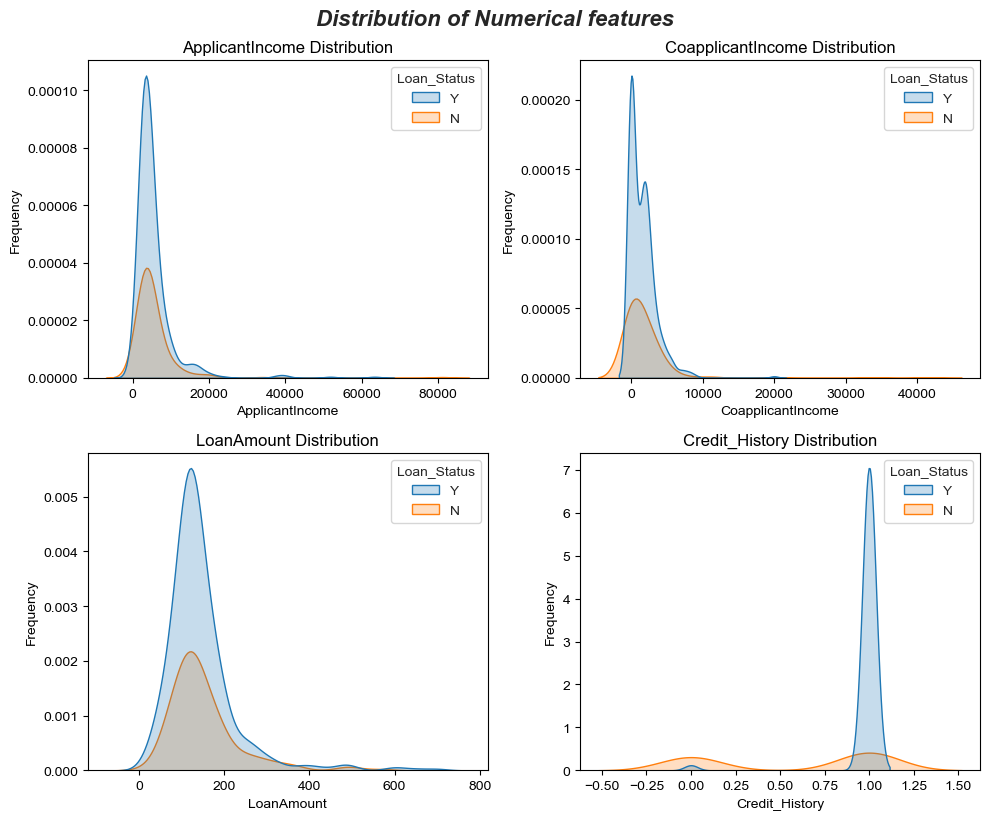

In [30]:
# Separate the numerical features/columns for analysis
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Credit_History']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
sns.set_style('whitegrid')

# Plot KDE plots for each numerical feature
for i, col in enumerate(numerical_cols):
    sns.kdeplot(data=df, x=col, ax=axes[i], hue='Loan_Status', fill=True)
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.suptitle("Distribution of Numerical features", y=1.02, fontsize=16,  weight='bold', style='italic')
plt.show()

### *Boxplots*

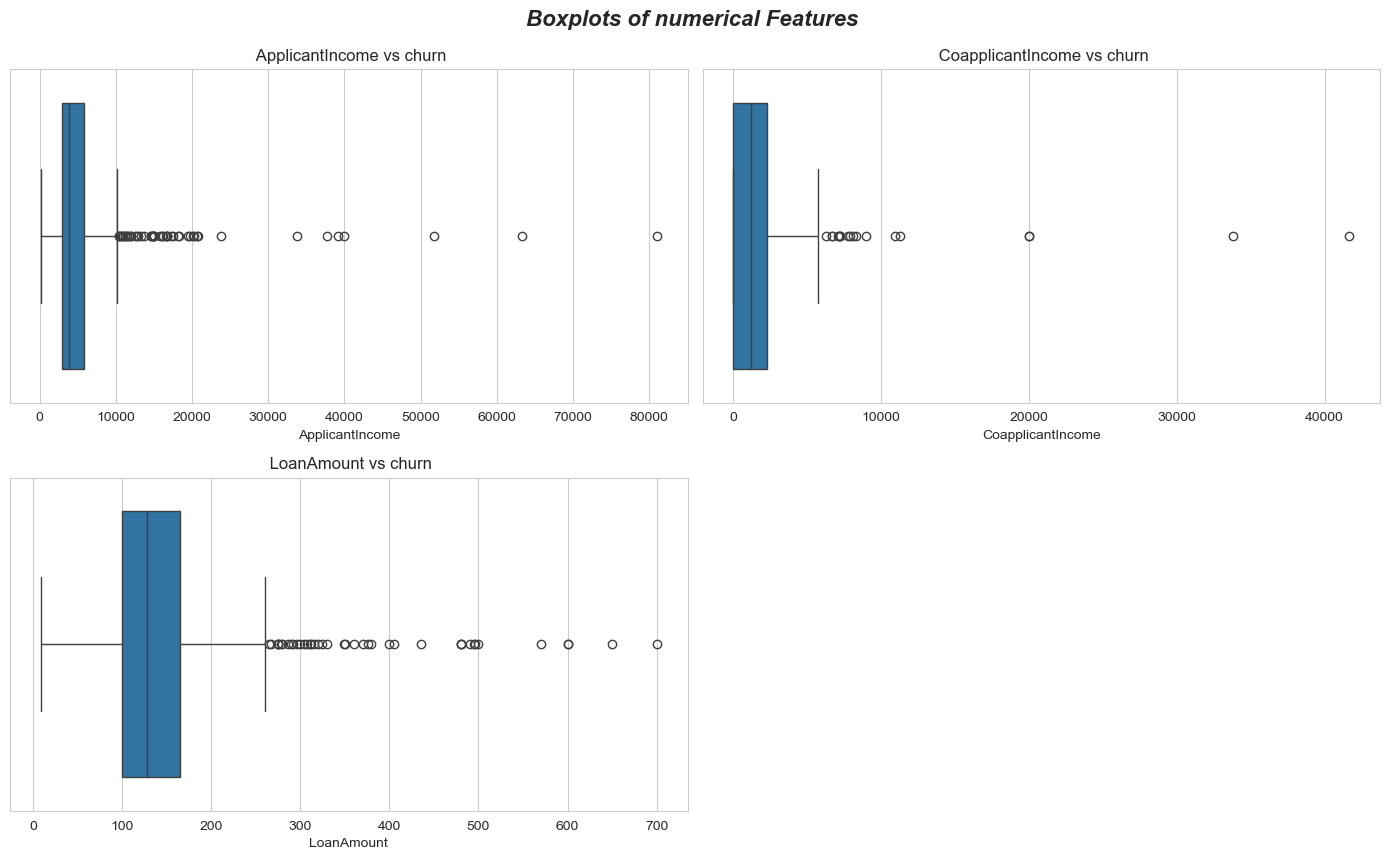

In [31]:
# Separate the numerical features/columns for analysis
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Plot the boxplots for each feature
plt.figure(figsize=(14, 12))
for i, col in enumerate(numerical_cols):
    # Subplots for boxplots
    plt.subplot(len(numerical_cols), 2, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(f' {col} vs churn')

# Adjust layout
plt.tight_layout()
plt.suptitle("Boxplots of numerical Features ", y=1.02, fontsize=16,  weight='bold', style='italic')
plt.show()


### *Bivariate analysis*

### *Boxplots for numerical features vs target*

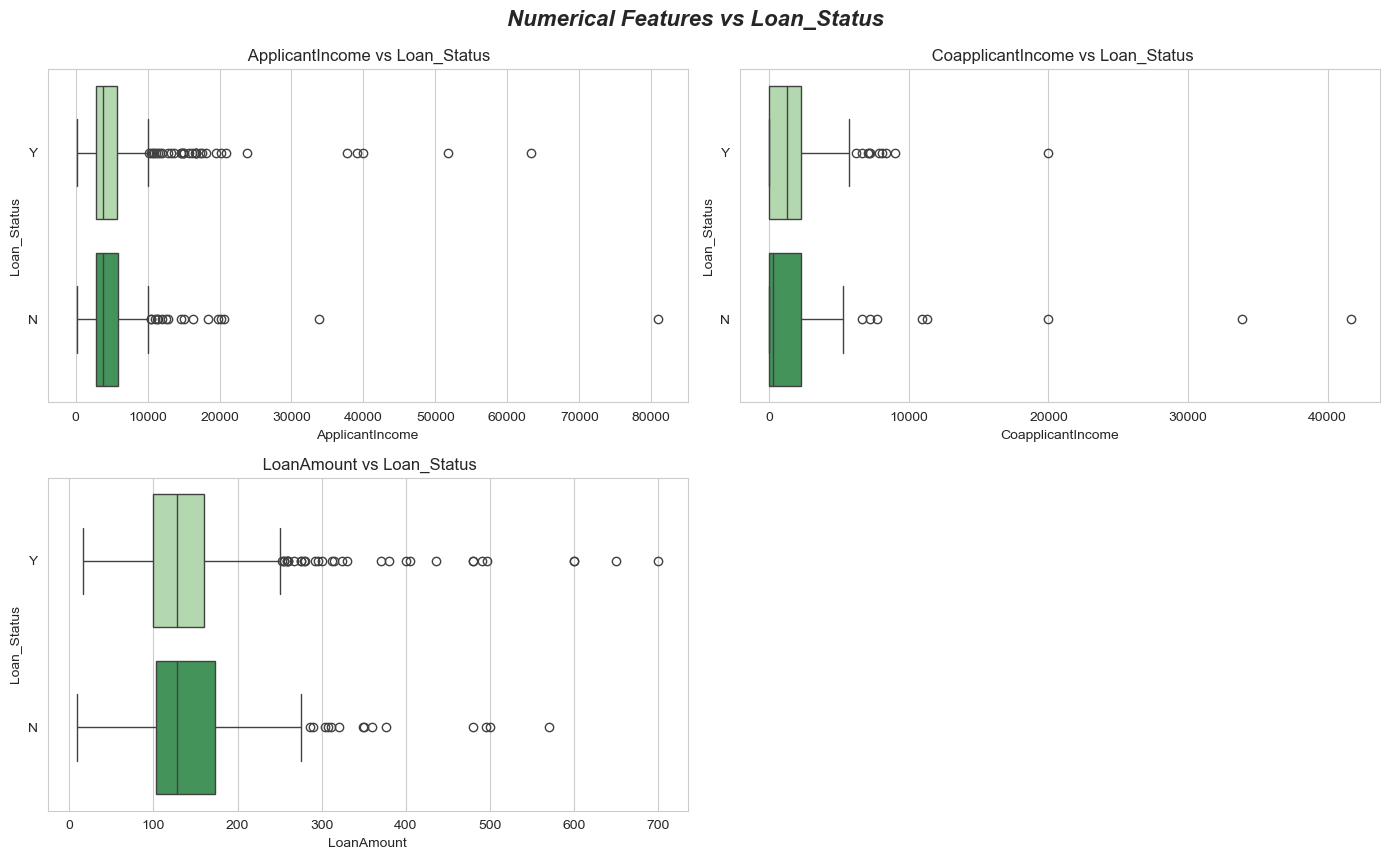

In [32]:
# Bivariate analysis of numerical features vs Loan_Status

# Separate the numerical features/columns for analysis
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Plot the box plots using subplots
plt.figure(figsize=(14, 12))
for i, col in enumerate(numerical_cols):
    # Subplots for boxplots
    plt.subplot(len(numerical_cols), 2, i+1)
    sns.boxplot(data=df, y='Loan_Status', hue='Loan_Status', x=col, palette='Greens')
    plt.title(f' {col} vs Loan_Status')

# Adjust layout
plt.tight_layout()
plt.suptitle("Numerical Features vs Loan_Status", y=1.02, fontsize=16,  weight='bold', style='italic')
plt.show()


### *Countplots for categorical features vs target*

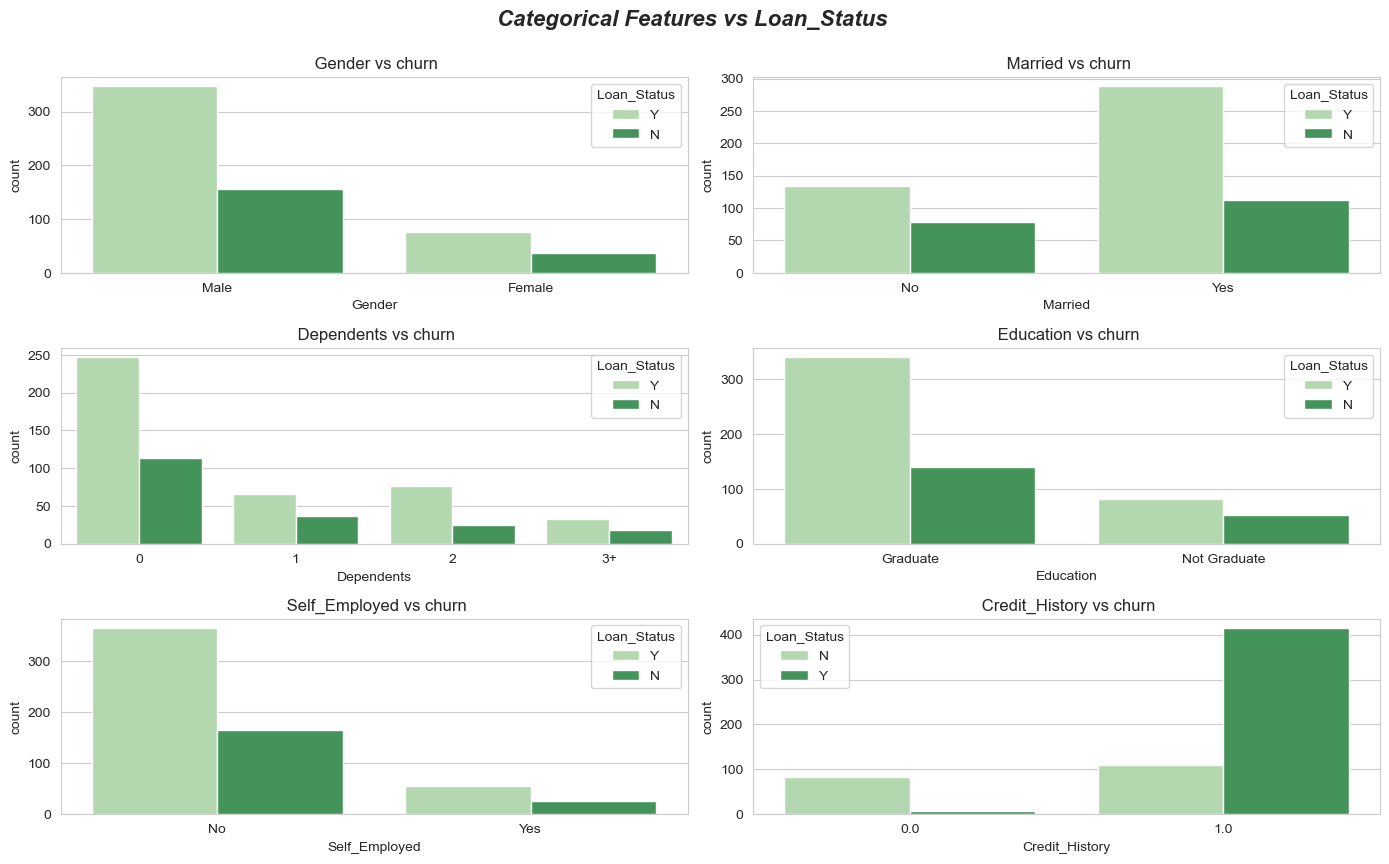

In [33]:
# Bivariate analysis of categorical features vs Loan_Status

# Separate the categorical columns for analysis
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education',	'Self_Employed', 'Credit_History']

# Plot the Count plots using subplots
plt.figure(figsize=(14, 16))
for i, col in enumerate(categorical_cols):
    # Subplots for countplots
    plt.subplot(len(categorical_cols), 2, i+1)
    sns.countplot(data=df, x=col, hue='Loan_Status', palette='Greens')
    plt.title(f' {col} vs churn')

# Adjust layout
plt.tight_layout()
plt.suptitle("Categorical Features vs Loan_Status ", y=1.02, fontsize=16,  weight='bold', style='italic')
plt.show()


### *Target variable ('Loan_Status') analysis*

In [34]:
# Check the count for each category
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

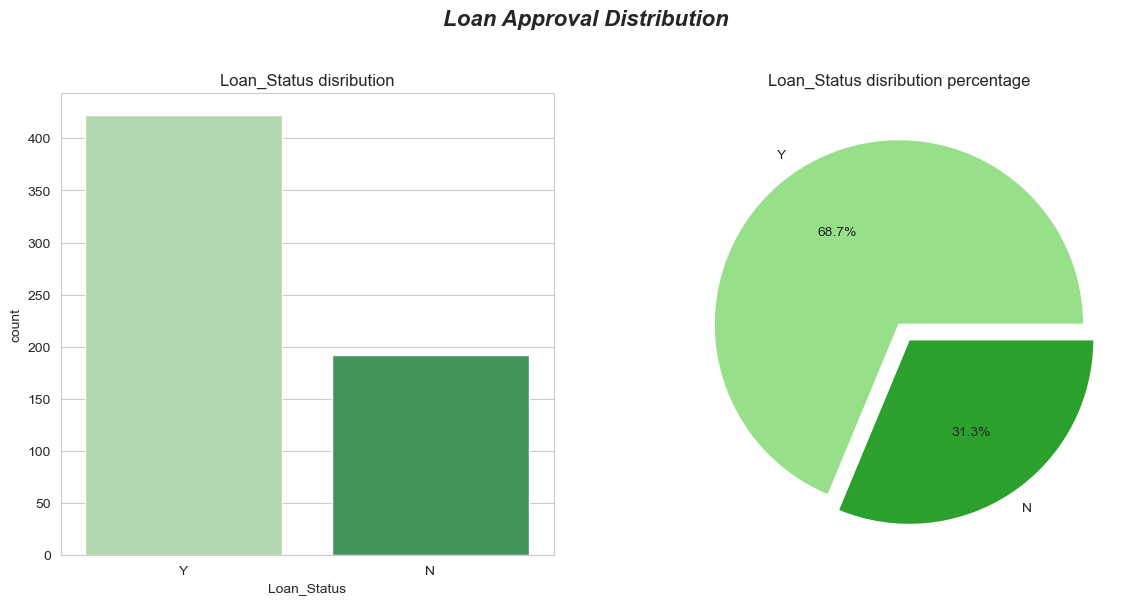

In [38]:
# Plotting a count plot and pie chart for the target 'Loan_Status'
plt.figure(figsize=(14,6))
# First subplot - count plot
plt.subplot(1,2,1)
sns.countplot(data=df, x="Loan_Status", hue='Loan_Status', palette='Greens')
plt.title("Loan_Status disribution")
# Calculate the count of each value in the "Loan_Status" column
count = df["Loan_Status"].value_counts()
# Second subplot - pie chart
plt.subplot(1,2,2)
plt.pie(count.values, labels=['Y', 'N'], autopct="%1.1f%%",explode=[0, 0.1], colors=['#98df8a', '#2ca02c'])
plt.title("Loan_Status disribution percentage")
plt.suptitle("Loan Approval Distribution", y=1.02, fontsize=16,  weight='bold', style='italic')
plt.show()

## *Multivariate Analysis*

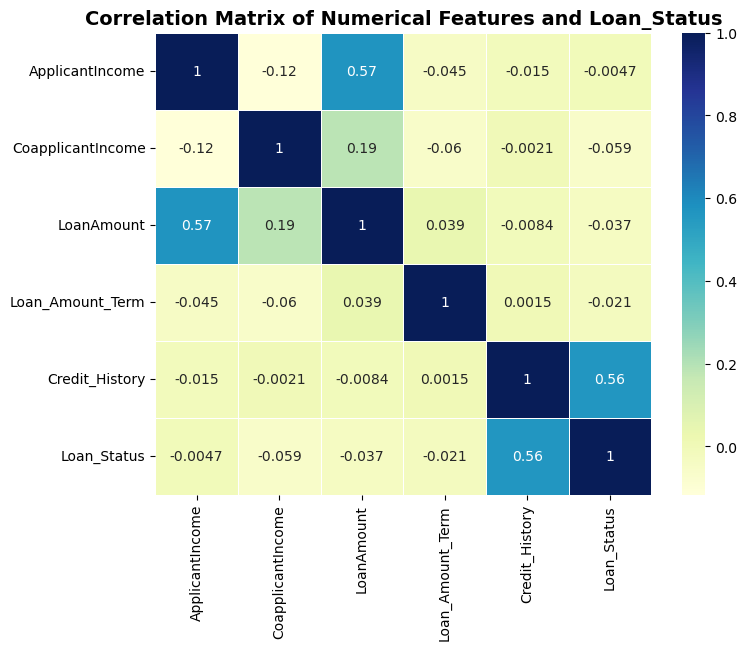

In [11]:
# Only include numerical features for multivariate analysis

# Label Encoding the target variable (Loan_Status)
loan_status_map = {'Y': 1, 'N': 0}
df['Loan_Status'] = df['Loan_Status'].map(loan_status_map)
numerical_features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']]

# Compute correlation matrix
corr_matrix = numerical_features.corr()

# Plot correlation matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features and Loan_Status", fontsize=14, fontweight='bold')
plt.show()


## *Categorical Feature Encoding*

### *Ordinal Mapping/Encoding*

In [146]:
# Ordinal mappings for ordinal categories
education_map = {'Not Graduate': 0, 'Graduate': 1}
dependents_map = {'0': 0, '1': 1, '2': 2, '3+': 3}

# Apply ordinal encoding
df['Education'] = df['Education'].map(education_map)
df['Dependents'] = df['Dependents'].map(dependents_map)


### *One Hot Encoding*

In [147]:
# List of nominal categories for one-hot encoding
nominal_cols = ['Gender', 'Married', 'Self_Employed', 'Property_Area', 'Loan_Amount_Term']

# Convert nominal features to string (in case of numeric-looking values)
for col in nominal_cols:
    df[col] = df[col].astype(str)

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Ensure all dummy columns are integers (0/1 instead of True/False)
df_encoded = df_encoded.astype(int)


In [149]:
# df_encoded is now ready with all categorical features encoded
df_encoded

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Gender_Male,Married_Yes,Self_Employed_Yes,...,Property_Area_Urban,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_36.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0
0,0,1,5849,0,128,1,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,1,4583,1508,128,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,3000,0,66,1,1,1,1,1,...,1,0,0,0,0,0,1,0,0,0
3,0,0,2583,2358,120,1,1,1,1,0,...,1,0,0,0,0,0,1,0,0,0
4,0,1,6000,0,141,1,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,2900,0,71,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
610,3,1,4106,0,40,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
611,1,1,8072,240,253,1,1,1,1,0,...,1,0,0,0,0,0,1,0,0,0
612,2,1,7583,0,187,1,1,1,1,0,...,1,0,0,0,0,0,1,0,0,0


## *Building a Classification Model*

### *Splitting train and test data*

In [150]:
# Import train_test_split from sklearn's model_Selection module to split datasets into random train and test subsets
from sklearn.model_selection import train_test_split

In [151]:
# Separate features (x) and target variable (y)
x = df_encoded.drop('Loan_Status', axis=1)
y = df_encoded['Loan_Status']

In [152]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

## *Feature Scaling*

In [153]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome',	'LoanAmount']
categorical_cols = ['Dependents', 'Education', 'Credit_History','Gender_Male','Married_Yes','Self_Employed_Yes','Property_Area_Semiurban','Property_Area_Urban','Loan_Amount_Term_120.0','Loan_Amount_Term_180.0','Loan_Amount_Term_240.0',	'Loan_Amount_Term_300.0','Loan_Amount_Term_36.0','Loan_Amount_Term_360.0','Loan_Amount_Term_480.0','Loan_Amount_Term_60.0',	'Loan_Amount_Term_84.0']

In [154]:
# Import StandardScaler from sklearn's preprocessing module
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler
scaler = StandardScaler()
# Fit and transform the features
x_train_scaled = scaler.fit_transform(x_train[numerical_cols])
x_test_scaled = scaler.transform(x_test[numerical_cols])

In [155]:
# Extract categorical features as numpy arrays
x_train_cat = x_train[categorical_cols].values
x_test_cat = x_test[categorical_cols].values

# Concatenate scaled features and categorical features
x_train_final = np.concatenate([x_train_scaled, x_train_cat], axis=1)
x_test_final = np.concatenate([x_test_scaled, x_test_cat], axis=1)

# Convert scaled NumPy arrays back to dataFrames
final_cols = numerical_cols + categorical_cols
x_train_df = pd.DataFrame(x_train_final, columns=final_cols, index=x_train.index)
x_test_df = pd.DataFrame(x_test_final, columns=final_cols, index=x_test.index)

# Optionally cast the categorical columns back to int
x_train_df[categorical_cols] = x_train_df[categorical_cols].astype(int)
x_test_df[categorical_cols] = x_test_df[categorical_cols].astype(int)

# Display numerical features after encoding and scaling
x_train_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Dependents,Education,Credit_History,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_36.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0
83,0.083915,0.180668,1.355734,0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0
90,-0.429338,0.385431,-0.197609,0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0
227,0.126095,0.005832,0.718168,2,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0
482,-0.576970,0.464186,-0.232385,0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0
464,-0.225522,-0.528126,-0.580149,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


## *Logistic Regression Model Training*

In [164]:
# Import LogisticRegression from sklearns's linear_model module to build and train the classification model
from sklearn.linear_model import LogisticRegression

In [165]:
# Build and train the model
reg_model = LogisticRegression( random_state=42)
reg_model.fit(x_res, y_res)

LogisticRegression(random_state=42)

## *Model predictions*

In [166]:
# Make predictions using the model
y_pred = reg_model.predict(x_test_df)

In [167]:
# Display the predicted and actual values as a pandas dataframe
performance = pd.DataFrame({'Prediction': y_pred, 'Actual':y_test})
performance.head(100)

,Prediction,Actual
350,1,1
377,1,1
163,1,1
609,0,1
132,1,1
...,...,...
176,1,1
473,1,1
86,1,1
181,0,0


## *Model Evaluation*

In [168]:
# Import accuracy_score and confusion_matrix from sklearn's metrics module to evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### *Accuracy score*

In [169]:
# Display the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.76


### *Confusion Matrix*

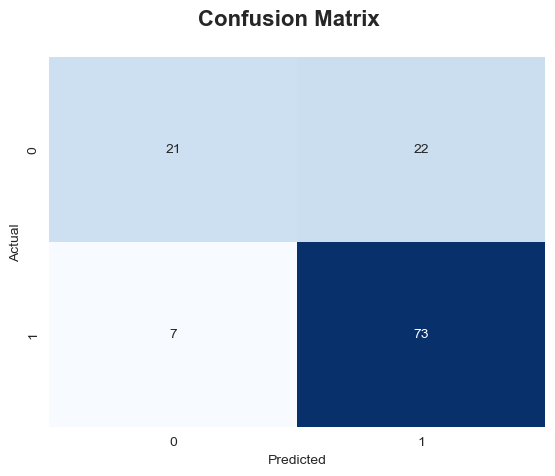

In [170]:
# Display the confusion matrix of the model using heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.suptitle('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()

### *Classification Report*

In [171]:
# Classification report: precision, recall, f1-score, support
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Loan Not Approved', 'Loan Approved']))

Classification Report:

                   precision    recall  f1-score   support

Loan Not Approved       0.75      0.49      0.59        43
    Loan Approved       0.77      0.91      0.83        80

         accuracy                           0.76       123
        macro avg       0.76      0.70      0.71       123
     weighted avg       0.76      0.76      0.75       123



# *Conclusion*

<p style='font-size:20px;'><i>The logistic regression model built for credit risk prediction demonstrates strong predictive ability, achieving an accuracy of approximately 76%. Through detailed preprocessing—handling missing values, encoding categorical variables, and scaling numerical features—the dataset was prepared effectively for modeling. Key insights from the analysis reveal that:</i></p>
<ul style='font-size:20px;'><i>
    <li>Credit history is the most influential factor in loan approval decisions.</li>
    <li>Applicants with higher income and lower loan amounts are slightly more likely to be approved, although the correlation is moderate.</li>
</i>
</ul>